## Regular Expressions:
Regular expression is a sequence of characters used to find  patterns in a string or file.


## Demo 1 

There are many ways that monetary values can be represented. Here are some examples:

21

$21

$21.56

$21.561

Below is the list of regular expressions to match the above values.

21 (Regex: “\d*”) 

$21 (Regex: “\$\d*”)

$21.56 (Regex: “\$\d*\.\d{2}”)

$21.561 (Regex: “^\$\d*\.\d{2}$”)

We use back slash to indicate that the pattern should match at the beginning of the string. 
The star (*) indicated one or more matches.
The caret ^ tells the pattern to start the  match at the beginning of a string.
The dollar sign would indicate that the pattern should be matched the end of the string. 

## Example_1 

In [1]:
import re

pattern = re.compile('\$\d*\.\d{2}')
# The above regex will find a match only for a digit followed by 2 
# digits after the decimal point. The numerical seqence must start with $
result = pattern.match('$21.56')
# Try changing $21.56 with 25.56, $34.2345, $2.5 and see what happens ! 

print(result)
print(result.group())
bool(result)
#Match objects have a group() method that will return the actual matched text from the searched string

<re.Match object; span=(0, 6), match='$21.56'>
$21.56


True

## Example_2

^a...s$:

The above sequence defines a RegEx pattern. 
The pattern is: any five letter string starting with 'a' and ending with 's'.

^ indicates that match is supposed to be found at the beginning of the string.

s$ indicates that the pattern must end with the letter "s".

... (three dots indicate there would be 3 letters between a and s)

In [2]:
import re

pattern = '^a...s$'
test_string = 'alias'
result = re.match(pattern, test_string) 
# The match will will be successful only if the test_string contains a 5 letter 
# word starting with "a" and ending with "s" 

if result:
  print("Search successful.")
else:
  print("Search unsuccessful.")	

# Note : Try changing the test_string with various other patterns and observe the 
# behavior 

Search successful.


Here, we used re.match() function to search pattern within the test_string. The method returns a match object if the search is successful. If not, it returns None.

## Example_3

Let’s check the phone numbers in our dataset. In this exercise we will define a regular expression to match US phone numbers in the following pattern: “xxx-xxx-xxxx”.

In [3]:
# Import the regular expression module
import re

# Compile the pattern: phone
phone = re.compile('\d{3}\-\d{3}\-\d{4}')
# The above regular expression means the following 
# \d{3} : Start with a 3 digit number 
# \-    : A hypen (-) after the 3 digit number 
# \d{3} : Another 3 digit number after the previously found hypen(-)
# \-    : A hypen (-) after the 3 digit number 
# \d{4} : A 4 digit number followed by the previously found hypen(-) 


result = phone.match("120-456-7890")# Check if the pattern matches 
print(bool(result))
print(result.group())

#Note: Try changing the phone number to the following and see what happens 
# 123-3451234
# 123-456-789
# 123456789

True
120-456-7890


## Example_4

Extracting numeric values found anywhere in a string

In [4]:
# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall('\d+', 'Smoothie ingredients: 3 bananas and 2 strawberries') 

# findall functions searches the entire string 
# \d+ : Any sequence of numbers which starts with at least one numeric digit !

print(matches)


['3', '2']


## DEMO 2 

## Common Python Regex Functions: The ‘re’ package provides multiple methods to perform queries on an input string. Here are the most commonly used methods.

#### re.search():

While re.findall() matches all instances of a pattern in a string and returns them in a list, the re.search() matches the first instance of a pattern in a string, and returns it.

The re.search() method returns nothing (if the pattern doesn’t match).

In [5]:
match = re.search("born.*", 'I was born in 1991') 
# born.* simply matches anything that appears after the word born
# . (the dot) matches anything (number, character, space etc)
# * (the star) matches one or more occurances of any thing 


print(match) #Display the match object which contains information about the 
#matching part of the string

print(match.group())#Match objects have a group() method that will return the actual matched text from the searched string
print(type(match)) # Displaying type of match object

<re.Match object; span=(6, 18), match='born in 1991'>
born in 1991
<class 're.Match'>


In [6]:
#What will happen if we remove the '.' from 'born.*'
match = re.search("born*", 'I was born in 1991 and my father was born in 1964') 
print(match)
print(match.group())
#Try to use another string like this 'I was born in 1991 and my father was 
#born in 1964' and then execute the code

<re.Match object; span=(6, 10), match='born'>
born


In [7]:
match = re.findall("born.*", 'I was born in 1991') # Here "." is a period that 
#matches any single character except the newline character and "*" checks if the 
#preceding character appears zero or more times.
#re.findall() matches all instances of a pattern in a string and returns them in a list

print(type(match))
print(match)
#Try to use another string like this 'I was born in 1991 and my father was 
#born in 1964' and then execute the code

<class 'list'>
['born in 1991']


#### re.split():

If you want to split a string that matches a regular expression instead of perfect match, use the split() of the 're' module. In re.split(), specify the regular expression pattern in the first parameter and the target character string in the second parameter.

In [8]:
import re

s_nums = 'one1two22three333four'
res = re.split('\d+', s_nums) #This splits the strings wherever the pattern 
#matches and returns a list.

#\d+ is the pattern used to find digits. This should be followed with a '+' 
#so that the previous element is matched one or more times.

#Since we have used '\d+' pattern to be search in the string 's_nums', so it 
#will split the string at each integer value present in the given string and 
#then it return the result in a list.
print(res)
#Try to change the value of 's_nums' and play around ! 

['one', 'two', 'three', 'four']


In [9]:
# If you want to set the limit for spliting the given string then you can use 'maxsplit' argument in the split() function  
#The maximum number of splits can be specified in the third parameter 'maxsplit'.

print(re.split('\d+', s_nums, 2))

['one', 'two', 'three333four']


#### re.sub():

If you want to replace a string that matches a regular expression instead of perfect match, use the sub() of the 're' module. In re.sub(), specify a regular expression pattern in the first argument, a new string in the second argument, and a string to be processed in the third argument.

In [21]:
import re

s = 'aa@xxx.com bbb@yyy.com ccc@zzz.com'
result = re.sub('[a-z]*@', 'ABC@', s)
#In this pattern '[a-z]*@', here [a-z] matches any letter from (a to z) and * 
#Checks if the preceeding characters appears zero or more times starting from 
#that position and the pattern ends with '@'

#This means that our pattern contain all the lowercase letter from a to z and our pattern end with @. 
# Here 's' is the string in which once a regular expression pattern is matched then that pattern 
# will be replaced by 'ABC@' 
 
print(result) 
#Try to change the of s like s= 'Aa@xxx.com bBb@yyy.com cCc@zzz.com' then see what happen

ABC@xxx.com ABC@yyy.com ABC@zzz.com


#### The accountant wants to calculate the total salary of 4 employees. But there is a dollar symbol before each number due to which it is difficult to calculate the sum. Help the accountant to remove the dollar sign and find the sum of the employees' salaries.

In [22]:
#Removing the $ symbole

In [23]:
strs = "$1000,$2000,$3000,$4000"
nstr = re.sub('[$|,]',' ',strs) 
# Here the pattern '[$|,]' indicates that our reggex pattern contain the 
#symbol '$', or ','
# Once this pattern is macthed in the string, it will be replaced by space.

nstr # The output contains the whitespaces wherever there is '$' and ',' in 
#the original string 'strs'

' 1000  2000  3000  4000'

In [24]:
L = list(nstr.split(" ")) # Spliting the 'nstr' wherever there is whitespace in the string 'nstr'
L

['', '1000', '', '2000', '', '3000', '', '4000']

In [25]:
int(L[1]) +  int(L[3]) + int(L[5]) + int(L[7]) #Now converting the element of the list into integer value so that we can perform the calculation

10000

## DEMO 3 

## Most commonly used operators in regular expression

Regular expressions can specify patterns, not just fixed characters. Here are the most commonly used operators that helps to generate an expression to represent required characters in a string or file. It is commonly used in web scrapping and  text mining to extract required information.

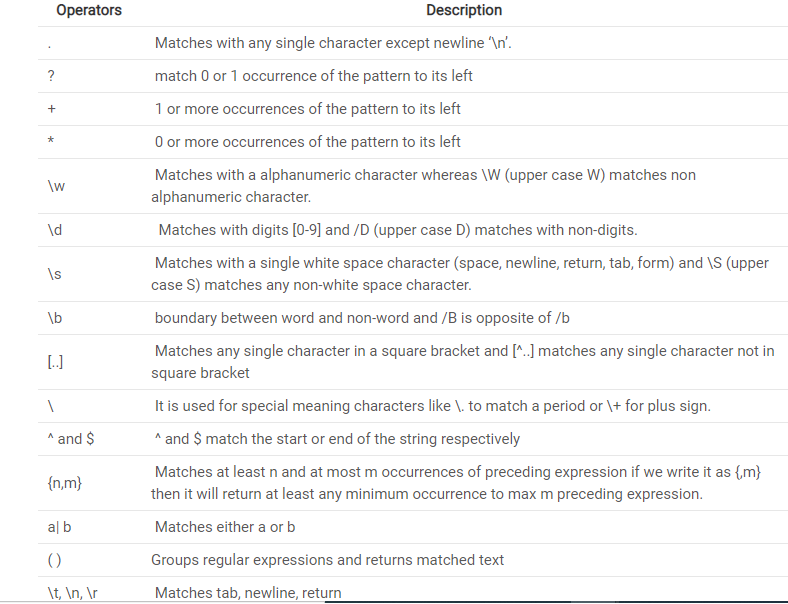

Extract each character (using “\w“)

In [26]:
#Extract each character using '.'
import re
result=re.findall('.','Learn Data Science')
# Here "." is a period that matches any single character except the newline character.
#Here re.findall() matches all instances of a pattern in a string and returns them in a list
print(result)

['L', 'e', 'a', 'r', 'n', ' ', 'D', 'a', 't', 'a', ' ', 'S', 'c', 'i', 'e', 'n', 'c', 'e']


In [26]:
result=re.findall('\w','Learn Data Science')
#Here the pattern '\w' matches any single letter, digit, or underscore.
# re.findall() matches all instances of a pattern in a string and returns them in a list

result

['L',
 'e',
 'a',
 'r',
 'n',
 'D',
 'a',
 't',
 'a',
 'S',
 'c',
 'i',
 'e',
 'n',
 'c',
 'e']

# Extract each word from string (using “*” or “+“)

In [27]:
# Extract each word (using “*” or "+")
result=re.findall('\w*','Learn Data Science') # '\w' matches any alphanumeric word character. It is essentially shorthand for [a-zA-Z0-9_]:
result
#Here, it is returning space as a word because “*” returns zero or more matches of pattern to its left. Now to remove spaces we will go with “+“.


['Learn', '', 'Data', '', 'Science', '']

In [28]:
result=re.findall('\w+','Learn Data Science in 180 days') 
#"w+": This expression matches an alphanumeric character in a string. 
#'w+' means one or more words. It will match every word in the string 
result
#Try to change the string and play around ! 

['Learn', 'Data', 'Science', 'in', '180', 'days']

# Extract the first word (using "^")

In [32]:
ult=re.findall('^\w+','Learn the Data Science')
# "^" - A caret. Matches the start of the string.
# "w+"  will match every word in the string
#This means it will match only the first word of the given string
print(ult)

['Learn']


# Extract the last word from a sentence

In [33]:
#If we will use “$” instead of “^”, it will return the word from the end of the string. Let’s look at it.
result=re.findall('\w+$','Learn the Data Science')
result

['Science']

# Extract two consecutive characters of each word, excluding spaces

In [34]:
#Extract consecutive two characters of each word, excluding spaces
result=re.findall(r'\w\w','Learn the Data Science')
#Since we have used '\w\w' so it will extract consecutive two characters of each word, excluding spaces
result
#What happend if you use \w three times

['Le', 'ar', 'th', 'Da', 'ta', 'Sc', 'ie', 'nc']

# Extract all characters after “@”

In [35]:
#Extract all characters after “@”
result=re.findall('@\w+','abc.test@gmail.com, xyz@test.in, test.first@yahoo.com, first.test@rest.biz') 
#The pattern '@\w+' will match the string starting from @ and the word present after the @
print(result) 

['@gmail', '@test', '@yahoo', '@rest']


In [36]:
#In the Above code , you can see that “.com”, “.in” part is not extracted. How can you do it?
result=re.findall('@\w+.\w+','abc.test@gmail.com, xyz@test.in, test.first@yahoo.com, first.test@rest.biz') 
# @\w+.\w+: The pattern '@\w+' will macth the string starting from @ and the word present after the @
# and then it will match the '.' and again \w+ will match the string with the next word after '.' 
print(result) 

['@gmail.com', '@test.in', '@yahoo.com', '@rest.biz']


# Extracting date from a string

In [37]:
#Return date from given string
result=re.findall('\d{2}-\d{2}-\d{4}','Amit 34-3456 12-05-2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12-01-2009')
#In this pattern '\d{2}-\d{2}-\d{4}'
# \d{2} : Start with a 2 digit number 
# \-    : A hypen (-) after the 2 digit number 
# \d{2} : Another 2 digit number after the previously found hypen(-)
# \-    : A hypen (-) after the 2 digit number 
# \d{4} : A 4 digit number followed by the previously found hypen(-) 
result

['12-05-2007', '11-11-2011', '12-01-2009']

## Demo 4 

## Data Pre-Processing from a CSV file  

Data scientists spend a large amount of their time cleaning datasets and getting them down to a form with which they can work. In fact, a lot of data scientists argue that the initial steps of obtaining and cleaning data constitute 80% of the job.

Twitter is an American microblogging and social networking service on which users post and interact with messages known as "tweets". Registered users can post, like, and retweet tweets, but unregistered users can only read them. Take a look at the data present in 'sample.csv' file. This file contain the various information about a tweet such as tweet id, tweet URL, tweet Post, twett content and many more.We will use this csv file to do data processing, data cleaning with the help of regular expression. 

In [38]:
# import libraries
import numpy as np # Importing the numpy library
import pandas as pd # importing pandas library to read csv file
import re  # for regular expressions


In [39]:
# import the csv file into a Pandas dataframe
tweet_df = pd.read_csv("sample.csv")

# view the shape of the data (the number of rows and columns)
print(f"The shape of the data is: {tweet_df.shape}")


The shape of the data is: (386, 21)


In [40]:
# view the data with the "tweet content" column widened to 800px so that the full tweet is displayed,
# and hide the index column
tweet_df.style.set_properties(subset=['Tweet_Content'], **{'width': '800px'}).hide_index()  

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11392\4028900486.py:3: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  tweet_df.style.set_properties(subset=['Tweet_Content'], **{'width': '800px'}).hide_index()


Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet_Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,User Id,Name,Username,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date,Impressions
"""1167429261210218497""",https://twitter.com/animalhealthEU/status/1167429261210218497,30-08-2019 13:30,Pets change our lives & become a part of our families ❤️ That's why our members offer many solutions to help you to enjoy a long-lasting bond with your happy & healthy pet 🐱🐶 #MorethanMedicine #PetCare #PetsareFamily https://t.co/fZNIXge9a3,Tweet,Twitter Ads Composer,0,4,Brussels,English,"""1017044760""",AnimalhealthEurope,animalhealthEU,AnimalhealthEurope represents manufacturers of animal medicines in Europe #AnimalHealthMatters,Non-Verified,https://twitter.com/animalhealthEU,Non-Protected,3697,542,17-12-2012 09:14,7394
"""1167375334670557185""",https://twitter.com/PennyBrohnUK/status/1167375334670557185,30-08-2019 09:55,Another spot of our #morethanmedicine bus in #bristol this week! If you need support with your cancer diagnosis call us on 0303 3000 118. #livingwellwithcancer https://t.co/eZGLz0BkXB,Tweet,Twitter Web App,0,5,"Pill, Bristol",English,"""190981222""",Penny Brohn UK,PennyBrohnUK,"We help people live well with the impact of cancer through physical, psychological and emotional support. We rely on voluntary donations & we need your support!",Non-Verified,https://twitter.com/PennyBrohnUK,Non-Protected,3227,1571,15-09-2010 09:44,6454
"""1167237977615097861""",https://twitter.com/lordbyronaf/status/1167237977615097861,30-08-2019 00:49,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,ReTweet,Twitter for Android,0,0,"Ohio, USA",English,"""716285395""",Lord ByronAF,lordbyronaf,"It's easier to be who you are, than it is to be who you think others want you to be. 18+ only. Cultured Brute #NorseUp #Bearcats",Non-Verified,https://twitter.com/lordbyronaf,Non-Protected,7808,8617,25-07-2012 15:43,0
"""1167236897078480898""",https://twitter.com/CountessDavis/status/1167236897078480898,30-08-2019 00:45,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,ReTweet,Twitter for Android,0,0,nan,English,"""824683748964851712""",Lisa Countess davis,CountessDavis,I am named after @ElvisPresley daughter Lisa Marie Presley I am nicknamed after @Dannycountkoker,Non-Verified,https://twitter.com/CountessDavis,Non-Protected,291,81,26-01-2017 18:21,0
"""1167228378191204353""",https://twitter.com/Local12/status/1167228378191204353,30-08-2019 00:11,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,ReTweet,TweetDeck,0,0,"Cincinnati, OH",English,"""16102208""",Local 12/WKRC-TV,Local12,Local 12 is #Cincinnati's trusted source for breaking news & complete coverage from the Weather Authority! Add us on Snapchat: Local12,Verified,https://twitter.com/Local12,Non-Protected,198675,651,02-09-2008 20:09,0
"""1167228285463531520""",https://twitter.com/lbonis1/status/1167228285463531520,30-08-2019 00:11,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,Tweet,Twitter for iPhone,3,17,WKRC TV,English,"""1272139182""",Liz Bonis,lbonis1,Health and Medical Reporter/News Anchor Registered Dietitian/Nutritionist & Personal Trainer,Verified,https://twitter.com/lbonis1,Non-Protected,6015,4866,16-03-2013 12:05,12033
"""1167163662051631104""",https://twitter.com/luapppank/status/1167163662051631104,29-08-2019 19:54,Will you be at #FIX19? Want a preview of @AG_EM33 story? Then check back Monday for #ChangeOfHeart where we sat down with Alin to discuss her new life since her heart #transplant #MoreThanMedicine https://t.co/Xl9zjr7kZ1,ReTweet,Twitter for iPhone,0,0,"Scottsdale, AZ",English,"""40654921""",paul knapp,luapppank,16.2 (and rising) hdcp golfer. fairways and greens. I loathe mustard! extremely grateful heart tra

### People use the hashtag symbol (#) before a relevant keyword or phrase in their tweets to categorize those tweets and help them show up  easily in during search. 

### let's find out how many tweets contain a hashtag in our csv file

In [41]:
# let's find out how many tweets contain a hashtag
tweets_with_hashtags = tweet_df.loc[tweet_df["Tweet_Content"].str.contains("#")]

# view the number of tweets that contain a hashtag
print(f"Number of tweets containing hashtags: {len(tweets_with_hashtags)}")

# view the tweets that contain a hashtag
tweets_with_hashtags\
.style.set_properties(subset=['Tweet_Content'], **{'width': '800px'}).hide_index()  

Number of tweets containing hashtags: 386


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11392\3604354610.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .style.set_properties(subset=['Tweet_Content'], **{'width': '800px'}).hide_index()


Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet_Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,User Id,Name,Username,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date,Impressions
"""1167429261210218497""",https://twitter.com/animalhealthEU/status/1167429261210218497,30-08-2019 13:30,Pets change our lives & become a part of our families ❤️ That's why our members offer many solutions to help you to enjoy a long-lasting bond with your happy & healthy pet 🐱🐶 #MorethanMedicine #PetCare #PetsareFamily https://t.co/fZNIXge9a3,Tweet,Twitter Ads Composer,0,4,Brussels,English,"""1017044760""",AnimalhealthEurope,animalhealthEU,AnimalhealthEurope represents manufacturers of animal medicines in Europe #AnimalHealthMatters,Non-Verified,https://twitter.com/animalhealthEU,Non-Protected,3697,542,17-12-2012 09:14,7394
"""1167375334670557185""",https://twitter.com/PennyBrohnUK/status/1167375334670557185,30-08-2019 09:55,Another spot of our #morethanmedicine bus in #bristol this week! If you need support with your cancer diagnosis call us on 0303 3000 118. #livingwellwithcancer https://t.co/eZGLz0BkXB,Tweet,Twitter Web App,0,5,"Pill, Bristol",English,"""190981222""",Penny Brohn UK,PennyBrohnUK,"We help people live well with the impact of cancer through physical, psychological and emotional support. We rely on voluntary donations & we need your support!",Non-Verified,https://twitter.com/PennyBrohnUK,Non-Protected,3227,1571,15-09-2010 09:44,6454
"""1167237977615097861""",https://twitter.com/lordbyronaf/status/1167237977615097861,30-08-2019 00:49,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,ReTweet,Twitter for Android,0,0,"Ohio, USA",English,"""716285395""",Lord ByronAF,lordbyronaf,"It's easier to be who you are, than it is to be who you think others want you to be. 18+ only. Cultured Brute #NorseUp #Bearcats",Non-Verified,https://twitter.com/lordbyronaf,Non-Protected,7808,8617,25-07-2012 15:43,0
"""1167236897078480898""",https://twitter.com/CountessDavis/status/1167236897078480898,30-08-2019 00:45,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,ReTweet,Twitter for Android,0,0,nan,English,"""824683748964851712""",Lisa Countess davis,CountessDavis,I am named after @ElvisPresley daughter Lisa Marie Presley I am nicknamed after @Dannycountkoker,Non-Verified,https://twitter.com/CountessDavis,Non-Protected,291,81,26-01-2017 18:21,0
"""1167228378191204353""",https://twitter.com/Local12/status/1167228378191204353,30-08-2019 00:11,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,ReTweet,TweetDeck,0,0,"Cincinnati, OH",English,"""16102208""",Local 12/WKRC-TV,Local12,Local 12 is #Cincinnati's trusted source for breaking news & complete coverage from the Weather Authority! Add us on Snapchat: Local12,Verified,https://twitter.com/Local12,Non-Protected,198675,651,02-09-2008 20:09,0
"""1167228285463531520""",https://twitter.com/lbonis1/status/1167228285463531520,30-08-2019 00:11,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,Tweet,Twitter for iPhone,3,17,WKRC TV,English,"""1272139182""",Liz Bonis,lbonis1,Health and Medical Reporter/News Anchor Registered Dietitian/Nutritionist & Personal Trainer,Verified,https://twitter.com/lbonis1,Non-Protected,6015,4866,16-03-2013 12:05,12033
"""1167163662051631104""",https://twitter.com/luapppank/status/1167163662051631104,29-08-2019 19:54,Will you be at #FIX19? Want a preview of @AG_EM33 story? Then check back Monday for #ChangeOfHeart where we sat down with Alin to discuss her new life since her heart #transplant #MoreThanMedicine https://t.co/Xl9zjr7kZ1,ReTweet,Twitter for iPhone,0,0,"Scottsdale, AZ",English,"""40654921""",paul knapp,luapppank,16.2 (and rising) hdcp golfer. fairways and greens. I loathe mustard! extremely grateful heart tra

### People also share some very important information using the url in their tweets. So how can you find the tweet containing the url? Also in our dataset, how many tweets contain the url?

## let's find out how many tweets contain a 'url' in our csv file

In [42]:
# how many tweets contain a URL i.e. "http"?
tweets_with_URLs = tweet_df.loc[tweet_df["Tweet_Content"].str.contains("http")]

# view the number of tweets that contain a URL
print(f"Number of tweets containing URLs: {len(tweets_with_URLs)}")

# view the tweets that contain a URL
tweets_with_URLs\
.style.set_properties(subset=['Tweet_Content'], **{'width': '800px'}).hide_index()  

Number of tweets containing URLs: 364


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11392\1396720851.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .style.set_properties(subset=['Tweet_Content'], **{'width': '800px'}).hide_index()


Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet_Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,User Id,Name,Username,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date,Impressions
"""1167429261210218497""",https://twitter.com/animalhealthEU/status/1167429261210218497,30-08-2019 13:30,Pets change our lives & become a part of our families ❤️ That's why our members offer many solutions to help you to enjoy a long-lasting bond with your happy & healthy pet 🐱🐶 #MorethanMedicine #PetCare #PetsareFamily https://t.co/fZNIXge9a3,Tweet,Twitter Ads Composer,0,4,Brussels,English,"""1017044760""",AnimalhealthEurope,animalhealthEU,AnimalhealthEurope represents manufacturers of animal medicines in Europe #AnimalHealthMatters,Non-Verified,https://twitter.com/animalhealthEU,Non-Protected,3697,542,17-12-2012 09:14,7394
"""1167375334670557185""",https://twitter.com/PennyBrohnUK/status/1167375334670557185,30-08-2019 09:55,Another spot of our #morethanmedicine bus in #bristol this week! If you need support with your cancer diagnosis call us on 0303 3000 118. #livingwellwithcancer https://t.co/eZGLz0BkXB,Tweet,Twitter Web App,0,5,"Pill, Bristol",English,"""190981222""",Penny Brohn UK,PennyBrohnUK,"We help people live well with the impact of cancer through physical, psychological and emotional support. We rely on voluntary donations & we need your support!",Non-Verified,https://twitter.com/PennyBrohnUK,Non-Protected,3227,1571,15-09-2010 09:44,6454
"""1167237977615097861""",https://twitter.com/lordbyronaf/status/1167237977615097861,30-08-2019 00:49,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,ReTweet,Twitter for Android,0,0,"Ohio, USA",English,"""716285395""",Lord ByronAF,lordbyronaf,"It's easier to be who you are, than it is to be who you think others want you to be. 18+ only. Cultured Brute #NorseUp #Bearcats",Non-Verified,https://twitter.com/lordbyronaf,Non-Protected,7808,8617,25-07-2012 15:43,0
"""1167236897078480898""",https://twitter.com/CountessDavis/status/1167236897078480898,30-08-2019 00:45,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,ReTweet,Twitter for Android,0,0,nan,English,"""824683748964851712""",Lisa Countess davis,CountessDavis,I am named after @ElvisPresley daughter Lisa Marie Presley I am nicknamed after @Dannycountkoker,Non-Verified,https://twitter.com/CountessDavis,Non-Protected,291,81,26-01-2017 18:21,0
"""1167228378191204353""",https://twitter.com/Local12/status/1167228378191204353,30-08-2019 00:11,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,ReTweet,TweetDeck,0,0,"Cincinnati, OH",English,"""16102208""",Local 12/WKRC-TV,Local12,Local 12 is #Cincinnati's trusted source for breaking news & complete coverage from the Weather Authority! Add us on Snapchat: Local12,Verified,https://twitter.com/Local12,Non-Protected,198675,651,02-09-2008 20:09,0
"""1167228285463531520""",https://twitter.com/lbonis1/status/1167228285463531520,30-08-2019 00:11,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩ #morethanmedicine https://t.co/g2YzMDUpVA,Tweet,Twitter for iPhone,3,17,WKRC TV,English,"""1272139182""",Liz Bonis,lbonis1,Health and Medical Reporter/News Anchor Registered Dietitian/Nutritionist & Personal Trainer,Verified,https://twitter.com/lbonis1,Non-Protected,6015,4866,16-03-2013 12:05,12033
"""1167163662051631104""",https://twitter.com/luapppank/status/1167163662051631104,29-08-2019 19:54,Will you be at #FIX19? Want a preview of @AG_EM33 story? Then check back Monday for #ChangeOfHeart where we sat down with Alin to discuss her new life since her heart #transplant #MoreThanMedicine https://t.co/Xl9zjr7kZ1,ReTweet,Twitter for iPhone,0,0,"Scottsdale, AZ",English,"""40654921""",paul knapp,luapppank,16.2 (and rising) hdcp golfer. fairways and greens. I loathe mustard! extremely grateful heart tra

### We need to create one long string containing all the tweets. This will be needed to perform operations using regular expressions.

In [43]:
# create a single string containing all the tweets, as this will be needed to be able to perform some operation
tweet_string = " ".join(x for x in tweet_df["Tweet_Content"]) #Joining the each value of column 'Tweet_Content' with a single space

# view the first 200 elements of the string to check this worked as expected
tweet_string

"Pets change our lives &amp; become a part of our families ❤️\nThat's why our members offer many solutions to help you to enjoy a long-lasting bond with your happy &amp; healthy pet 🐱🐶\n#MorethanMedicine #PetCare #PetsareFamily https://t.co/fZNIXge9a3 Another spot of our #morethanmedicine bus in #bristol this week! If you need support with your cancer diagnosis call us on 0303 3000 118. #livingwellwithcancer https://t.co/eZGLz0BkXB What a great team \u2066@HealthSourceOH\u2069 \u2066@Local12\u2069 #morethanmedicine https://t.co/g2YzMDUpVA What a great team \u2066@HealthSourceOH\u2069 \u2066@Local12\u2069 #morethanmedicine https://t.co/g2YzMDUpVA What a great team \u2066@HealthSourceOH\u2069 \u2066@Local12\u2069 #morethanmedicine https://t.co/g2YzMDUpVA What a great team \u2066@HealthSourceOH\u2069 \u2066@Local12\u2069 #morethanmedicine https://t.co/g2YzMDUpVA Will you be at #FIX19? Want a preview of @AG_EM33 story? Then check back Monday for #ChangeOfHeart where we sat down with Alin t

### Let's clean up the data using "re" to use regular expressions ("RegEx").

### Replace all the URLs with  '__URL__'

In [46]:
#replace all the URLs with '_URL_'
#Since we want to replace all the url start with http by the '_URL_', so let's use the sub() function
tweet_string = re.sub('http\S+','_URL_ ', tweet_string)
#sub() is the substitute function. It returns the string obtained by replacing or substituting 
#the leftmost non-overlapping occurrences of pattern (http\S+) in string by the replacement (_URL_)
#\S+ (upper case S) matches any non-white space character and '+' indicate 1 or more occurrences 
#of the pattern to its left

# view the first 2000 elements of the string to check this worked as expected
tweet_string[0:2000]

"Pets change our lives &amp; become a part of our families ❤️\nThat's why our members offer many solutions to help you to enjoy a long-lasting bond with your happy &amp; healthy pet 🐱🐶\n#MorethanMedicine #PetCare #PetsareFamily _URL_  Another spot of our #morethanmedicine bus in #bristol this week! If you need support with your cancer diagnosis call us on 0303 3000 118. #livingwellwithcancer _URL_  What a great team \u2066@HealthSourceOH\u2069 \u2066@Local12\u2069 #morethanmedicine _URL_  What a great team \u2066@HealthSourceOH\u2069 \u2066@Local12\u2069 #morethanmedicine _URL_  What a great team \u2066@HealthSourceOH\u2069 \u2066@Local12\u2069 #morethanmedicine _URL_  What a great team \u2066@HealthSourceOH\u2069 \u2066@Local12\u2069 #morethanmedicine _URL_  Will you be at #FIX19? Want a preview of @AG_EM33 story? Then check back Monday for #ChangeOfHeart where we sat down with Alin to discuss her new life since her heart #transplant #MoreThanMedicine _URL_  Will you be at #FIX19? Wan

### Remove extra white spaces from tweet so that there is only one space between the words.

In [95]:
# remove extra white spaces so there is only one space between words
tweet_string = re.sub(r'\s+',' ', tweet_string) #Replacing extra white space by a single space

# view the first 2000 elements of the string to check this worked as expected
tweet_string[0:2000]

"pets change our lives &amp; become a part of our families ❤️ that's why our members offer many solutions to help you to enjoy a long-lasting bond with your happy &amp; healthy pet 🐱🐶 #morethanmedicine #petcare #petsarefamily _url_ another spot of our #morethanmedicine bus in #bristol this week! if you need support with your cancer diagnosis call us on 0303 3000 118. #livingwellwithcancer _url_ what a great team \u2066@healthsourceoh\u2069 \u2066@local12\u2069 #morethanmedicine _url_ what a great team \u2066@healthsourceoh\u2069 \u2066@local12\u2069 #morethanmedicine _url_ what a great team \u2066@healthsourceoh\u2069 \u2066@local12\u2069 #morethanmedicine _url_ what a great team \u2066@healthsourceoh\u2069 \u2066@local12\u2069 #morethanmedicine _url_ will you be at #fix19? want a preview of @ag_em33 story? then check back monday for #changeofheart where we sat down with alin to discuss her new life since her heart #transplant #morethanmedicine _url_ will you be at #fix19? want a previ

## Remove double quotes from the column User Id.

In order to perform some numerical operation, we need to have a data in numeric form. In our dataset there is the column "user id" which contain the numerical values, but in our dataset this column has the double quotes which change the meaning of all the values under this column. So how can you remove double quote from each value of present in the column 'user id?

In [96]:
#Since we need to remove the double quotes from all the values of the column 'User id', so let's
# create a single string containing all the user id, as this will be needed to be able to perform our operation
tweet_number = " ".join(Tweet for Tweet in tweet_df["User Id"])

# view the first 200 elements of the string to check this worked as expected
tweet_number

'"1017044760" "190981222" "716285395" "824683748964851712" "16102208" "1272139182" "40654921" "713575674741567489" "2214581178" "44166456" "2418217254" "707582957599461376" "3171175349" "280451091" "3285827227" "66092868" "302026558" "1093427318071181312" "832489887496417280" "2952636665" "3149379940" "581176601" "2446798215" "1344630583" "1344630583" "58876040" "581176601" "959543935214456834" "988381683341766656" "2418217254" "44166456" "2214581178" "707582957599461376" "967027033556611072" "218447561" "203599711" "4751998915" "959543935214456834" "2214581178" "538221586" "730800147198791680" "1035140194104737792" "1017044760" "190981222" "742124696410435585" "730800147198791680" "44166456" "711115694478270464" "2418217254" "3082914497" "707582957599461376" "218447561" "1017044760" "2418217254" "1019965175472971776" "954061831" "2214581178" "820129486972665856" "707582957599461376" "462419938" "3139977498" "742124696410435585" "2715335126" "880019300806995968" "44166456" "2214581178"

In [97]:
# remove double quotes
tweet_number = re.sub('"', '', tweet_number)
# view the first 2000 elements to check this worked as expected
tweet_number[0:2000]

'1017044760 190981222 716285395 824683748964851712 16102208 1272139182 40654921 713575674741567489 2214581178 44166456 2418217254 707582957599461376 3171175349 280451091 3285827227 66092868 302026558 1093427318071181312 832489887496417280 2952636665 3149379940 581176601 2446798215 1344630583 1344630583 58876040 581176601 959543935214456834 988381683341766656 2418217254 44166456 2214581178 707582957599461376 967027033556611072 218447561 203599711 4751998915 959543935214456834 2214581178 538221586 730800147198791680 1035140194104737792 1017044760 190981222 742124696410435585 730800147198791680 44166456 711115694478270464 2418217254 3082914497 707582957599461376 218447561 1017044760 2418217254 1019965175472971776 954061831 2214581178 820129486972665856 707582957599461376 462419938 3139977498 742124696410435585 2715335126 880019300806995968 44166456 2214581178 2418217254 707582957599461376 1062097760650964992 1315436972 422924634 2725528551 190981222 1093427318071181312 2548339440 19098122